In [3]:
import pandas as pd
import matplotlib as plt 
import seaborn as sns 
import numpy as np

In [4]:
df_all_years_2 = pd.read_csv('/Users/pierreloyal/Desktop/Bootcamp CA/capital_bike_share/CBS_2021-2023_Full.csv')

/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_35678/2430969816.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all_years_2 = pd.read_csv('/Users/pierreloyal/Desktop/Bootcamp CA/capital_bike_share/CBS_2021-2023_Full.csv')


In [5]:
df_weather_all = pd.read_csv('CBS_2021-2023_Daily_Weather.csv')

In [6]:
df_weather_all.rename(columns= { 'Date' : 'started_at'}, inplace=True)
df_weather_all.rename(columns= { 'apparent_temperature_mean (°C)' : 'temperature'}, inplace=True)
df_weather_all.rename(columns= { 'weathercode (wmo code)' : 'wmo_code'}, inplace=True)
df_weather_all.rename(columns= { 'windspeed_10m_max (km/h)' : 'windspeed'}, inplace=True)
df_weather_all.rename(columns= { 'Casual' : 'casual'}, inplace=True)
df_weather_all.rename(columns= { 'Member' : 'member'}, inplace=True)
df_weather_all.rename(columns= { 'Total_rides' : 'total_rides'}, inplace=True)

## Adding weather condition column

In [7]:
# Function to categorize weather codes
def categorize_weather_code(code):
    if code == 0:
        return 'clear'
    elif 1 <= code <= 3:
        return 'cloudy'
    elif 51 <= code <= 55:
        return 'drizzle'
    elif 61 <= code <= 65:
        return 'rain'
    elif 71 <= code <= 75:
        return 'snow'
    else:
        return 'unknown'  # For any code that doesn't match the given categories

# Apply the function to create the new column
df_weather_all['weather_condition'] = df_weather_all['wmo_code'].apply(categorize_weather_code)



## Turn dates to datetime

In [8]:
df_all_years_2["started_at"] = pd.to_datetime(df_all_years_2["started_at"])
df_all_years_2["ended_at"] = pd.to_datetime(df_all_years_2["ended_at"])

df_weather_all['started_at'] = pd.to_datetime(df_weather_all['started_at'])

## Merging Datasets

In [9]:
import pandas as pd

# Assuming df_all_years_2 and df_weather_all are already defined and started_at columns converted to datetime

# Normalize 'started_at' in df_all_years_2 to just the date part
df_all_years_2['started_at_date'] = df_all_years_2['started_at'].dt.date

# Also convert 'started_at' in df_weather_all to just the date part for consistency
df_weather_all['started_at_date'] = df_weather_all['started_at'].dt.date

# Now, you can merge using 'started_at_date' as the key, which is consistent across both DataFrames
df_all_years= pd.merge(df_all_years_2, df_weather_all, left_on='started_at_date', right_on='started_at_date', how='left')

# Drop the extra 'started_at_date' column if you prefer
df_all_years.drop(['started_at_date'], axis=1, inplace=True)

In [10]:
df_all_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 22 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   ride_id                   object        
 1   rideable_type             object        
 2   started_at_x              datetime64[ns]
 3   ended_at                  datetime64[ns]
 4   start_station_name        object        
 5   start_station_id          object        
 6   end_station_name          object        
 7   end_station_id            object        
 8   start_lat                 float64       
 9   start_lng                 float64       
 10  end_lat                   float64       
 11  end_lng                   float64       
 12  member_casual             object        
 13  casual                    int64         
 14  started_at_y              datetime64[ns]
 15  member                    int64         
 16  total_rides               int64         
 17  temper

## Dropping columns

In [11]:
# Dropping multiple columns
df_all_years.drop(['casual', 'member', 'started_at_y', 'total_rides', 'temperature_2m_mean (°C)'], axis=1, inplace=True)


In [12]:
df_all_years.columns

Index(['ride_id', 'rideable_type', 'started_at_x', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'temperature', 'wmo_code', 'windspeed',
       'weather_condition'],
      dtype='object')

## Renaming Columns

In [13]:
df_all_years.rename(columns= { 'rideable_type' : 'bike_type'}, inplace=True)
df_all_years.rename(columns= { 'member_casual' : 'customer_type'}, inplace=True)
df_all_years.rename(columns= { 'started_at_x' : 'started_at'}, inplace=True)

In [14]:
import pandas as pd

df_all_years['day_sort'] = df_all_years['started_at'].dt.dayofweek.map(lambda x: 'weekend' if x >= 5 else 'workday')

df_all_years['day_sort'] = df_all_years['started_at'].dt.dayofweek.map(lambda x: 'weekend' if x >= 5 else 'workday')
df_all_years['hour'] = df_all_years['started_at'].dt.hour
df_all_years['date'] = df_all_years['started_at'].dt.date

## Create Season Column

In [15]:
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'winter'
    elif date.month in [3, 4, 5]:
        return 'spring'
    elif date.month in [6, 7, 8]:
        return 'summer'
    elif date.month in [9, 10, 11]:
        return 'autumn'

df_all_years['season'] = df_all_years['started_at'].apply(get_season)

## Rearranging columns

In [16]:
df_all_years = df_all_years[["ride_id", "started_at", "ended_at", "day_sort", "start_station_name", "end_station_name", "start_station_id", "end_station_id", "season", "temperature", "weather_condition", "customer_type", "bike_type", "start_lat", "start_lng", "end_lat", "end_lng"]]

## Splitting Dataset per Year (2021-2022-2023)

In [17]:
df_all_years['started_at'] = pd.to_datetime(df_all_years['started_at'])


df_2021 = df_all_years[df_all_years['started_at'].dt.year == 2021]

df_2022 = df_all_years[df_all_years['started_at'].dt.year == 2022]

df_2023 = df_all_years[df_all_years['started_at'].dt.year == 2023]

## Defining day_type

In [18]:
bank_holiday = ['2023-01-02', '2023-01-16', '2023-02-20', '2023-05-29', '2023-06-19', '2023-07-04', '2023-09-04', '2023-10-09', '2023-11-10', '2023-11-23', '2023-12-25']  
school_holidays = [('2023-02-18', '2023-02-24'), ('2023-03-15', '2023-03-21'), ('2023-07-01', '2023-08-27'),('2023-11-22', '2023-11-26'), ('2023-12-22', '2023-12-31')]

df_2023['day_type'] = 'regular'

bank_holiday_dates = pd.to_datetime(bank_holiday).date  
df_2023.loc[df_2023['started_at'].dt.date.isin(bank_holiday_dates), 'day_type'] = 'bank_holiday'

for start, end in school_holidays:
    df_2023.loc[df_2023['started_at'].dt.date.between(pd.to_datetime(start).date(), pd.to_datetime(end).date()), 'day_type'] = 'school_holidays'



/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_35678/3397632010.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['day_type'] = 'regular'


## Activity on Union Station/ Columbus Circle 

In [19]:
min_lat= 38.894792
max_lat= 38.898934
min_lng= -77.009062
max_lng= -77.003365


# Filtering for starting points within the specified boundaries
starts_within_zone = df_2023[(df_2023['start_lat'] >= min_lat) & (df_2023['start_lat'] <= max_lat) &
                             (df_2023['start_lng'] >= min_lng) & (df_2023['start_lng'] <= max_lng)]

# Filtering for ending points within the specified boundaries
ends_within_zone = df_2023[(df_2023['end_lat'] >= min_lat) & (df_2023['end_lat'] <= max_lat) &
                           (df_2023['end_lng'] >= min_lng) & (df_2023['end_lng'] <= max_lng)]

# Concatenating the two DataFrames while removing duplicates (if any)
df_union_station= pd.concat([starts_within_zone, ends_within_zone]).drop_duplicates()

In [20]:
min_lat= 38.894792
max_lat= 38.898934
min_lng= -77.009062
max_lng= -77.003365


# Filtering for starting points within the specified boundaries
starts_within_zone = df_all_years[(df_all_years['start_lat'] >= min_lat) & (df_all_years['start_lat'] <= max_lat) &
                             (df_all_years['start_lng'] >= min_lng) & (df_all_years['start_lng'] <= max_lng)]

# Filtering for ending points within the specified boundaries
ends_within_zone = df_all_years[(df_all_years['end_lat'] >= min_lat) & (df_all_years['end_lat'] <= max_lat) &
                           (df_all_years['end_lng'] >= min_lng) & (df_all_years['end_lng'] <= max_lng)]

# Concatenating the two DataFrames while removing duplicates (if any)
df_union_station_2= pd.concat([starts_within_zone, ends_within_zone]).drop_duplicates()

In [21]:
import folium

# Average coordinates for the center of the map
center_lat = (min_lat + max_lat) / 2
center_lng = (min_lng + max_lng) / 2

# Create a map centered at the average location
m = folium.Map(location=[center_lat, center_lng], zoom_start=17)

# Define coordinates for the polygon representing the zone
zone_union = [
    [38.898934, -77.008921],
    [38.897422, -77.003464],
    [38.894792, -77.003365],
    [38.894925, -77.009062],
    [38.898934, -77.008921]  # Repeat the first point to close the polygon
]

# Add the polygon to the map
folium.Polygon(zone_union, color="hotpink", weight=2.5, fill=True, fill_opacity=0.5).add_to(m)

m


## Activity on Jefferson Dr & 14th St SW

In [22]:
min_lat_2= 38.887431
max_lat_2= 38.889218
min_lng_2= -77.033970
max_lng_2= -77.031760



# Filtering for starting points within the specified boundaries
starts_within_zone_2 = df_2023[(df_2023['start_lat'] >= min_lat_2) & (df_2023['start_lat'] <= max_lat_2) &
                             (df_2023['start_lng'] >= min_lng_2) & (df_2023['start_lng'] <= max_lng_2)]

# Filtering for ending points within the specified boundaries
ends_within_zone_2 = df_2023[(df_2023['end_lat'] >= min_lat_2) & (df_2023['end_lat'] <= max_lat_2) &
                           (df_2023['end_lng'] >= min_lng_2) & (df_2023['end_lng'] <= max_lng_2)]

# Concatenating the two DataFrames while removing duplicates (if any)
df_jefferson= pd.concat([starts_within_zone_2, ends_within_zone_2]).drop_duplicates()

In [23]:
import folium

# Average coordinates for the center of the map
center_lat_2 = (min_lat_2 + max_lat_2) / 2
center_lng_2 = (min_lng_2 + max_lng_2) / 2

# Create a map centered at the average location
m_2 = folium.Map(location=[center_lat_2, center_lng_2], zoom_start=16)

# Define coordinates for the polygon representing the zone
zone_jefferson = [
    [38.889218, -77.033155],
    [38.887648, -77.033970],
    [38.887431, -77.031835],
    [38.888800, -77.031760],
    [38.889218, -77.033155]  # Repeat the first point to close the polygon
]

# Add the polygon to the map
folium.Polygon(zone_jefferson, color="blue", weight=2.5, fill=True, fill_opacity=0.5).add_to(m_2)

m_2


## Defining 2 polygones

In [24]:
import folium

# Calculate the average coordinates for the center of the combined areas
center_lat = (min(min_lat, min_lat_2) + max(max_lat, max_lat_2)) / 2
center_lng = (min(min_lng, min_lng_2) + max(max_lng, max_lng_2)) / 2

# Create a single map centered at the average location
m_3 = folium.Map(location=[center_lat, center_lng], zoom_start=15)

# Define coordinates for the first polygon
zone_union = [
    [38.898934, -77.008921],
    [38.897422, -77.003464],
    [38.894792, -77.003365],
    [38.894925, -77.009062],
    [38.898934, -77.008921]  # Repeat the first point to close the polygon
]

# Add the first polygon to the map
folium.Polygon(zone_union, color="hotpink", weight=2.5, fill=True, fill_opacity=0.5).add_to(m_3)

# Define coordinates for the second polygon
zone_jefferson = [
    [38.889218, -77.033155],
    [38.887648, -77.033970],
    [38.887431, -77.031835],
    [38.888800, -77.031760],
    [38.889218, -77.033155]  # Repeat the first point to close the polygon
]

# Add the second polygon to the map
folium.Polygon(zone_jefferson, color="blue", weight=2.5, fill=True, fill_opacity=0.5).add_to(m_3)

# Adjustments for the yellow label to move it slightly more north and west
label_latitude_adjustment_yellow = 0.0006
label_longitude_adjustment_yellow = -0.0005
label_location_yellow = [max(lat for lat, lng in zone_jefferson) + label_latitude_adjustment_yellow, 
                         sum(lng for lat, lng in zone_jefferson)/len(zone_jefferson) + label_longitude_adjustment_yellow]


folium.map.Marker(
    label_location_yellow,
    icon=folium.DivIcon(
        html=f"""<div style="font-family: sans-serif; color: blue; font-size: 22px; white-space: nowrap;">Jefferson Dr & 14th St SW</div>"""
    )
).add_to(m_3)

# Find the southernmost point of the first polygon for the blue label and adjust to move it west
label_longitude_adjustment_blue = -0.0010  # Moving it more west
label_location_blue = [min(lat for lat, lng in zone_union) - 0.0005, 
                       sum(lng for lat, lng in zone_union)/len(zone_union) + label_longitude_adjustment_blue]


folium.map.Marker(
    label_location_blue,
    icon=folium.DivIcon(
        html=f"""<div style="font-family: sans-serif; color: hotpink; font-size: 22px; white-space: nowrap;">Union Station/Columbus Circle</div>"""
    )
).add_to(m_3)

# Display the map with both polygons and the adjusted labels
m_3


In [25]:
df_union_station_2.columns

Index(['ride_id', 'started_at', 'ended_at', 'day_sort', 'start_station_name',
       'end_station_name', 'start_station_id', 'end_station_id', 'season',
       'temperature', 'weather_condition', 'customer_type', 'bike_type',
       'start_lat', 'start_lng', 'end_lat', 'end_lng'],
      dtype='object')

In [26]:
df_union_station['hour'] = df_union_station['started_at'].dt.hour
df_union_station['date'] = df_union_station['started_at'].dt.date
df_union_station['year'] = df_union_station['started_at'].dt.year 

## Rides prediction in a time slot 

In [27]:
# Convert started_at to datetime (if not already done)
df_union_station['started_at'] = pd.to_datetime(df_union_station['started_at'])

# Extract hour before converting to date
df_union_station['hour'] = df_union_station['started_at'].dt.hour

# Now, convert started_at to just date for the 'started_at' column
df_union_station['started_at_date'] = df_union_station['started_at'].dt.date

# Group by the new date column and hour, then count rides per hour
rides_per_hour = df_union_station.groupby(['started_at_date', 'hour']).size().reset_index(name='num_rides')

# Merge the aggregated data back into df_union_station
# Note that we're now merging on 'started_at_date' and 'hour'
df_union_station = pd.merge(df_union_station, rides_per_hour, on=['started_at_date', 'hour'], how='left')



In [28]:
rides_per_hour.shape

(7496, 3)

In [29]:
df_union_station.shape

(91619, 23)

In [36]:
df_union_station.columns

Index(['ride_id', 'started_at', 'ended_at', 'day_sort', 'start_station_name',
       'end_station_name', 'start_station_id', 'end_station_id', 'season',
       'temperature', 'weather_condition', 'customer_type', 'bike_type',
       'start_lat', 'start_lng', 'end_lat', 'end_lng', 'day_type', 'hour',
       'date', 'year', 'started_at_date', 'num_rides',
       'weather_condition_encoded'],
      dtype='object')

In [35]:
df_union_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91619 entries, 0 to 91618
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ride_id                    91619 non-null  object        
 1   started_at                 91619 non-null  datetime64[ns]
 2   ended_at                   91619 non-null  datetime64[ns]
 3   day_sort                   91619 non-null  object        
 4   start_station_name         90375 non-null  object        
 5   end_station_name           90508 non-null  object        
 6   start_station_id           90375 non-null  object        
 7   end_station_id             90508 non-null  object        
 8   season                     91619 non-null  object        
 9   temperature                91619 non-null  float64       
 10  weather_condition          91619 non-null  object        
 11  customer_type              91619 non-null  object        
 12  bike

In [30]:
df_union_station.head(10)

,ride_id,started_at,ended_at,day_sort,start_station_name,end_station_name,start_station_id,end_station_id,season,temperature,...,start_lat,start_lng,end_lat,end_lng,day_type,hour,date,year,started_at_date,num_rides
0,86463BC492392A5F,2023-01-01 01:00:42,2023-01-01 01:05:18,weekend,Columbus Circle / Union Station,6th & H St NE,31623.0,31615.0,winter,8.4,...,38.89696,-77.00493,38.899972,-76.998347,regular,1,2023-01-01,2023,2023-01-01,7
1,07C3DAA8F09B804B,2023-01-01 01:01:06,2023-01-01 01:05:43,weekend,Columbus Circle / Union Station,6th & H St NE,31623.0,31615.0,winter,8.4,...,38.89696,-77.00493,38.899972,-76.998347,regular,1,2023-01-01,2023,2023-01-01,7
2,2BF9CC1B9751906C,2023-01-01 01:33:04,2023-01-01 01:38:46,weekend,Columbus Circle / Union Station,3rd St & Pennsylvania Ave SE,31623.0,31269.0,winter,8.4,...,38.89696,-77.00493,38.887378,-77.001955,regular,1,2023-01-01,2023,2023-01-01,7
3,DF47E698A3403B67,2023-01-01 01:35:51,2023-01-01 01:46:15,weekend,Columbus Circle / Union Station,13th & D St NE,31623.0,31622.0,winter,8.4,...,38.89696,-77.00493,38.894832,-76.987633,regular,1,2023-01-01,2023,2023-01-01,7
4,967D952FBB20B845,2023-01-01 01:57:33,2023-01-01 02:04:33,weekend,Columbus Circle / Union Station,4th & East Capitol St NE,31623.0,31618.0,winter,8.4,...,38.89696,-77.00493,38.889955,-77.000349,regular,1,2023-01-01,2023,2023-01-01,7
5,117B8C702EC5A457,2023-01-01 01:57:38,2023-01-01 02:04:36,weekend,Columbus Circle / Union Station,4th & East Capitol St NE,31623.0,31618.0,winter,8.4,...,38.89696,-77.00493,38.889955,-77.000349,regular,1,2023-01-01,2023,2023-01-01,7
6,C8E704BB91639F5F,2023-01-01 01:57:58,2023-01-01 02:02:56,weekend,Columbus Circle / Union Station,D St & Maryland Ave NE,31623.0,31612.0,winter,8.4,...,38.89696,-77.00493,38.894841,-76.995916,regular,1,2023-01-01,2023,2023-01-01,7
7,4A765E54FA0F4EEC,2023-01-01 06:31:34,2023-01-01 06:40:22,weekend,Columbus Circle / Union Station,11th & C St SE,31623.0,31659.0,winter,8.4,...,38.89696,-77.00493,38.885908,-76.991476,regular,6,2023-01-01,2023,2023-01-01,1
8,A1B743FD5F5E84B6,2023-01-01 09:33:21,2023-01-01 09:45:09,weekend,Columbus Circle / Union Station,4th & G St SW,31623.0,31666.0,winter,8.4,...,38.89696,-77.00493,38.881117,-77.017699,regular,9,2023-01-01,2023,2023-01-01,1
9,B7F0D02F4E18A3C4,2023-01-01 11:10:03,2023-01-01 11:12:53,weekend,Columbus Circle / Union Station,6th & H St NE,31623.0,31615.0,winter,8.4,...,38.89696,-77.00493,38.899972,-76.998347,regular,11,2023-01-01,2023,2023-01-01,4


In [47]:
from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder
label_encoder = LabelEncoder()

# List of columns to encode
categorical_columns = ['season', 'weather_condition', 'day_sort', 'day_type']

# Apply label encoding to each categorical column and create new columns for them
for column in categorical_columns:
    df_final[column + '_encoded'] = label_encoder.fit_transform(df_final[column])

# Prepare the list of columns for the correlation matrix, using the encoded columns
columns_encoded = ['num_rides', 'season_encoded', 'hour', 'temperature', 'weather_condition_encoded', 'day_sort_encoded', 'day_type_encoded']




/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_35678/1251191858.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[column + '_encoded'] = label_encoder.fit_transform(df_final[column])
/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_35678/1251191858.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[column + '_encoded'] = label_encoder.fit_transform(df_final[column])
/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_35678/1251191858.py:11: SettingWithCopy

In [39]:
df_final = df_union_station[(df_union_station['hour'] >= 7) & (df_union_station['hour'] <= 19)]


/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_35678/29030433.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[column + '_encoded'] = label_encoder.fit_transform(df_final[column])
/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_35678/29030433.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[column + '_encoded'] = label_encoder.fit_transform(df_final[column])
/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_35678/29030433.py:16: SettingWithCopyWarnin

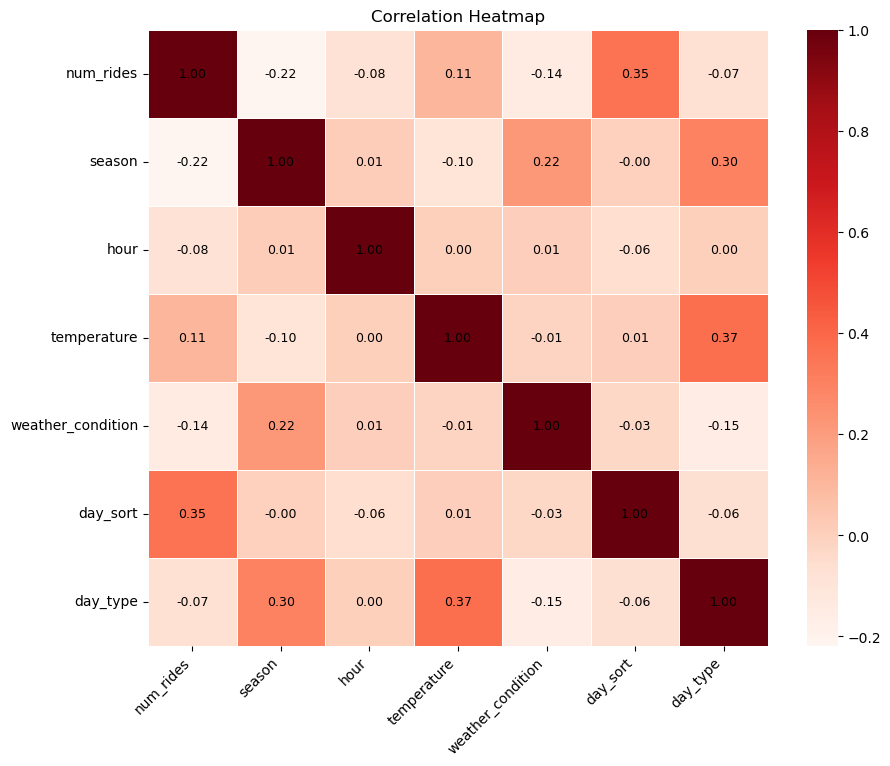

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming the DataFrame df_final is already loaded

# Initialize a label encoder for categorical columns
label_encoder = LabelEncoder()

# List of columns to encode
categorical_columns = ['season', 'weather_condition', 'day_sort', 'day_type']

# Apply label encoding to each categorical column and create new columns for them
for column in categorical_columns:
    df_final[column + '_encoded'] = label_encoder.fit_transform(df_final[column])

# Prepare the list of columns for the correlation matrix, using the encoded columns
columns_encoded = ['num_rides', 'season_encoded', 'hour', 'temperature', 'weather_condition_encoded', 'day_sort_encoded', 'day_type_encoded']

# Calculate the correlation matrix for the encoded columns
correlation_matrix = df_final[columns_encoded].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool_))

# Create a new index for the correlation matrix without '_encoded'
new_index = [column.replace('_encoded', '') for column in correlation_matrix.index]

# Update the index and columns of the correlation matrix to remove '_encoded'
correlation_matrix.index = new_index
correlation_matrix.columns = new_index

# Plotting the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, cmap='Reds', linewidths=.5)

# Add title
plt.title('Correlation Heatmap')

# Manually annotate all cells with the correlation values
for i, (idx, row) in enumerate(correlation_matrix.iterrows()):
    for j, val in enumerate(row):
        ax.text(j+0.5, i+0.5, f"{val:.2f}", 
                color='black', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.show()


/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_35678/2137252971.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[column + '_encoded'] = label_encoder.fit_transform(df_final[column])
/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_35678/2137252971.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[column + '_encoded'] = label_encoder.fit_transform(df_final[column])
/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_35678/2137252971.py:16: SettingWithCopy

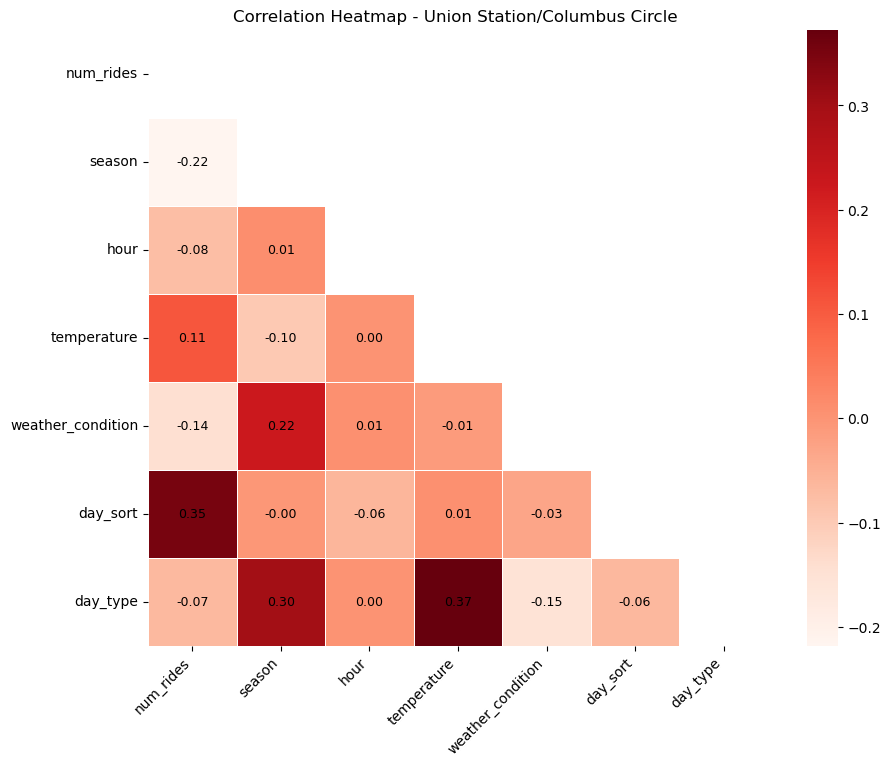

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming the DataFrame df_final is already loaded

# Initialize a label encoder for categorical columns
label_encoder = LabelEncoder()

# List of columns to encode
categorical_columns = ['season', 'weather_condition', 'day_sort', 'day_type']

# Apply label encoding to each categorical column and create new columns for them
for column in categorical_columns:
    df_final[column + '_encoded'] = label_encoder.fit_transform(df_final[column])

# Prepare the list of columns for the correlation matrix, using the encoded columns
columns_encoded = ['num_rides', 'season_encoded', 'hour', 'temperature', 'weather_condition_encoded', 'day_sort_encoded', 'day_type_encoded']

# Calculate the correlation matrix for the encoded columns
correlation_matrix = df_final[columns_encoded].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a new index for the correlation matrix without '_encoded'
new_index = [column.replace('_encoded', '') for column in correlation_matrix.index]

# Update the index and columns of the correlation matrix to remove '_encoded'
correlation_matrix.index = new_index
correlation_matrix.columns = new_index

# Plotting the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, cmap='Reds', mask=mask, linewidths=.5)

# Add title
plt.title('Correlation Heatmap - Union Station/Columbus Circle ')

# Manually annotate only the visible (lower half) cells with the correlation values
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        if mask[i, j]:
            continue  # Skip cells that are masked
        ax.text(j+0.5, i+0.5, f"{correlation_matrix.iloc[i, j]:.2f}", 
                color='black', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.show()


In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd



# Add a new column for 'weather_condition' using LabelEncoder
label_encoder = LabelEncoder()
df_final['weather_condition_encoded'] = label_encoder.fit_transform(df_final['weather_condition'])

# One-hot encode other categorical variables
df_union_station_encoded = pd.get_dummies(df_final, columns=['season', 'day_sort', 'day_type'])

# Update the features list to include 'temperature' and the encoded 'weather_condition'
features = [
    'hour',
    'temperature',
    'weather_condition_encoded',
    'season_spring', 'season_summer', 'season_autumn', 'season_winter',
    'day_sort_workday', 'day_sort_weekend',
    'day_type_regular', 'day_type_bank_holiday', 'day_type_school_holidays'
]

X = df_union_station_encoded[features]
y = df_union_station_encoded['num_rides']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_35678/1397771769.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['weather_condition_encoded'] = label_encoder.fit_transform(df_final['weather_condition'])


Mean Squared Error: 157.74474657039636
R^2 Score: 0.21493367267316899


In [41]:
weather_condition_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

print(weather_condition_mapping)

{'clear': 0, 'cloudy': 1, 'drizzle': 2, 'rain': 3, 'snow': 4}


## Polynomial Regression

In [42]:
from sklearn.preprocessing import PolynomialFeatures

# Define degree of polynomial features
poly_degree = 4

# Initialize the PolynomialFeatures transformer
poly_transformer = PolynomialFeatures(degree=poly_degree, include_bias=False)

# Fit and transform the features to create polynomial features
X_poly = poly_transformer.fit_transform(X)

# Split the polynomial features and target variable into training and test sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the linear regression model on the polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predict on the test set with polynomial features
y_pred_poly = model_poly.predict(X_test_poly)

# Calculate performance metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Polynomial Regression Mean Squared Error: {mse_poly}')
print(f'Polynomial Regression R^2 Score: {r2_poly}')


Polynomial Regression Mean Squared Error: 77.04382839287697
Polynomial Regression R^2 Score: 0.6165671649001492


In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

# Split your original dataset into training and test sets first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first creates polynomial features, then applies linear regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('linear', LinearRegression())
])

# Define the parameters to tune. Here we're just tuning the degree of polynomial features.
# You can add more parameters related to the model if necessary.
parameters = {
    'poly__degree': [4]  # Example degrees, adjust based on your expectations and computing resources
}

# Setup the GridSearchCV to find the best polynomial degree and fit the model
# You can adjust cv (cross-validation splitting strategy) as needed
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameter found
print(f"Best polynomial degree: {grid_search.best_params_['poly__degree']}")

# Use the best model to predict on the test set
y_pred_test = grid_search.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Best polynomial degree: 4
Mean Squared Error: 77.04382839287697
R^2 Score: 0.6165671649001492
